/home/alonso/anaconda3/envs/eye_oct/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


149 ../data_UKB/Analysis_dataset/IRD_RPE65_02_5681571.vol
P004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


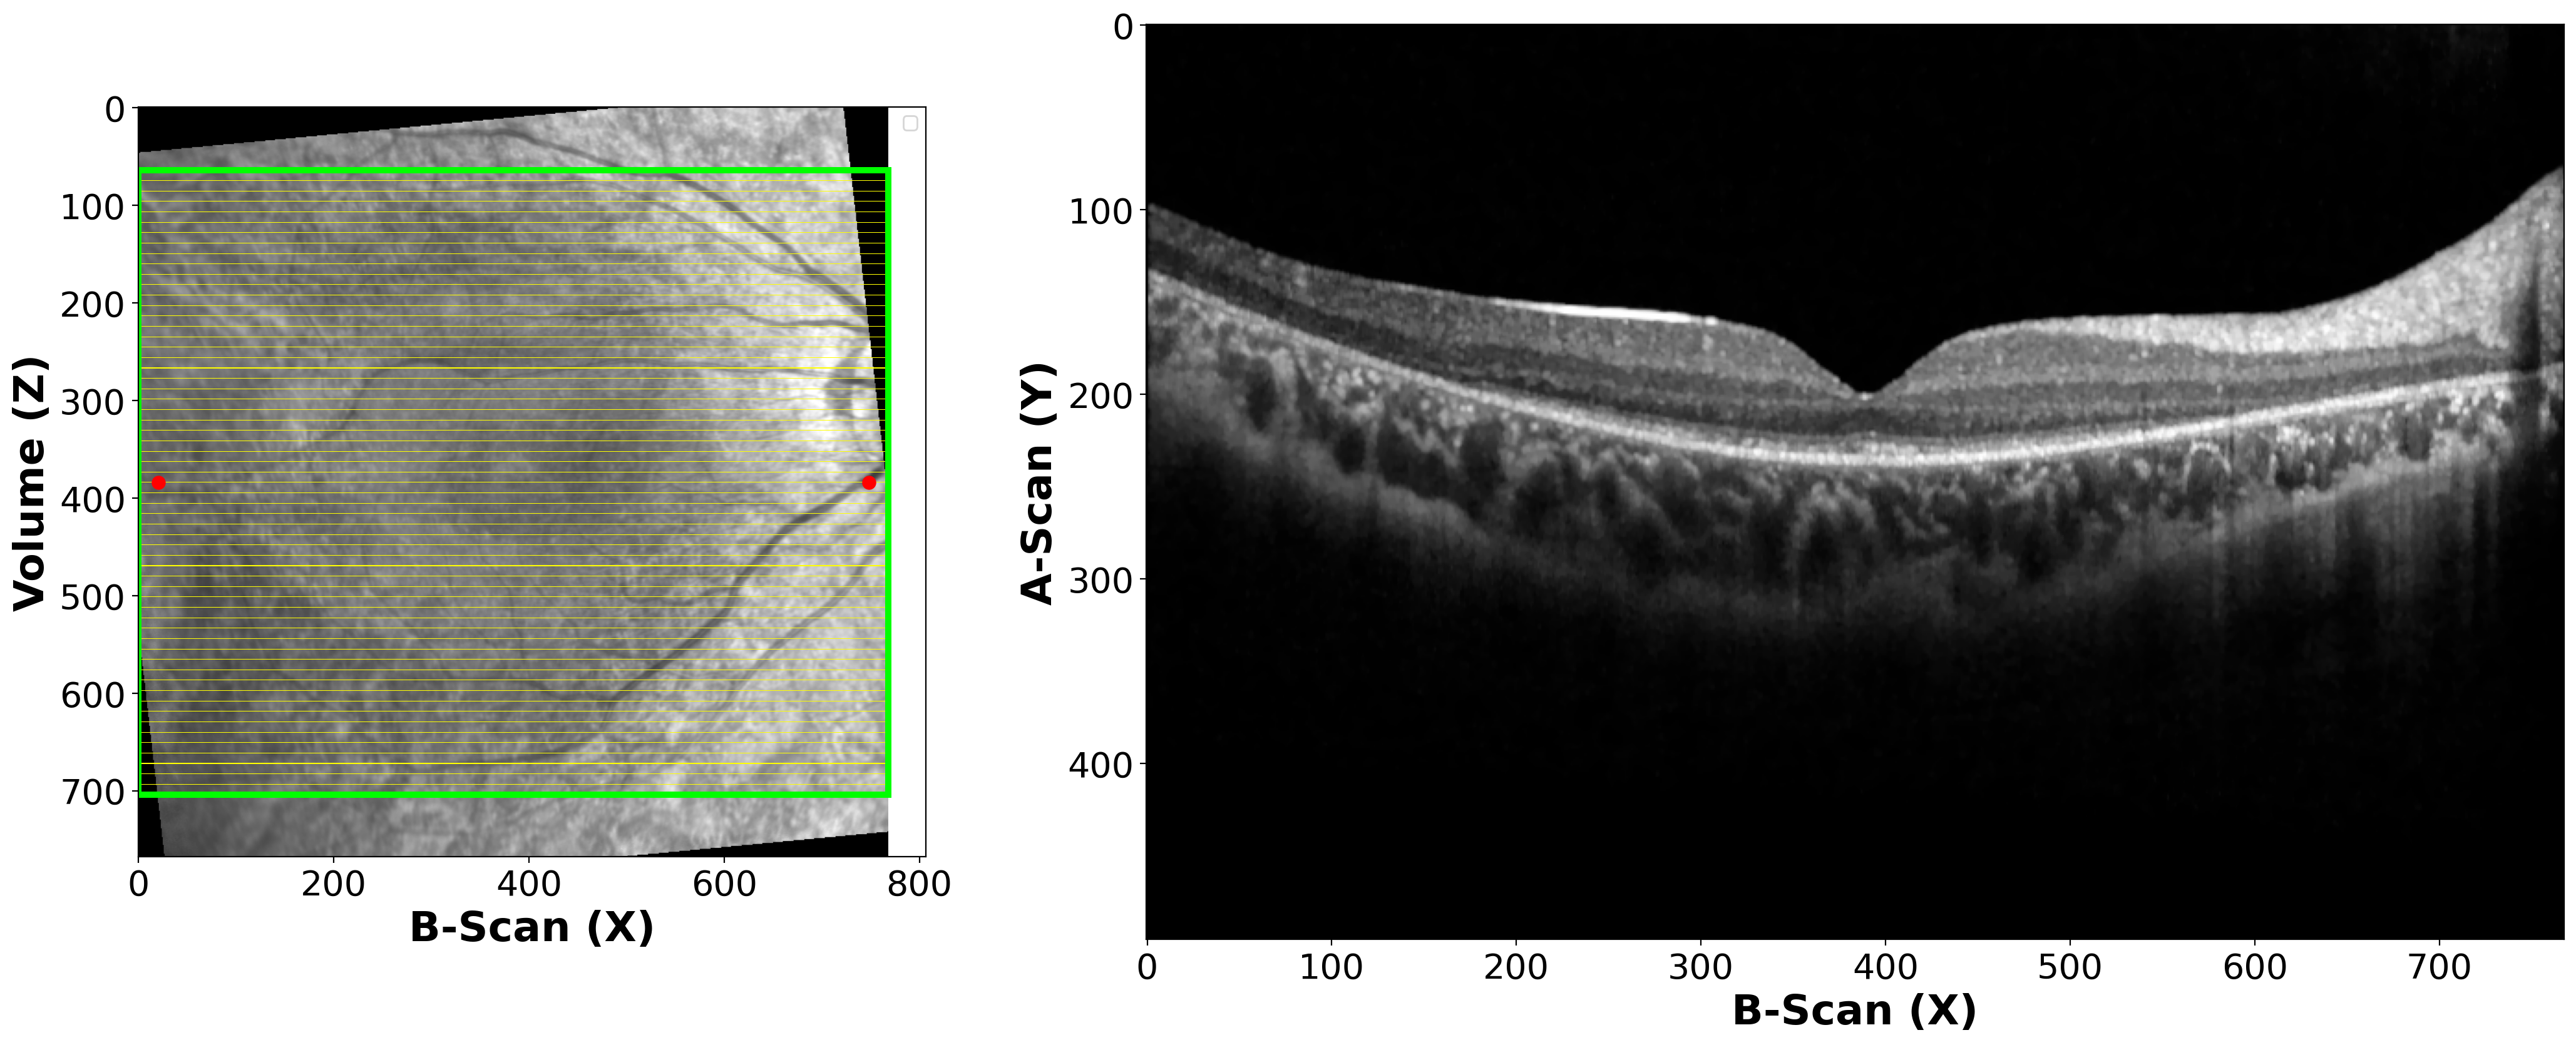

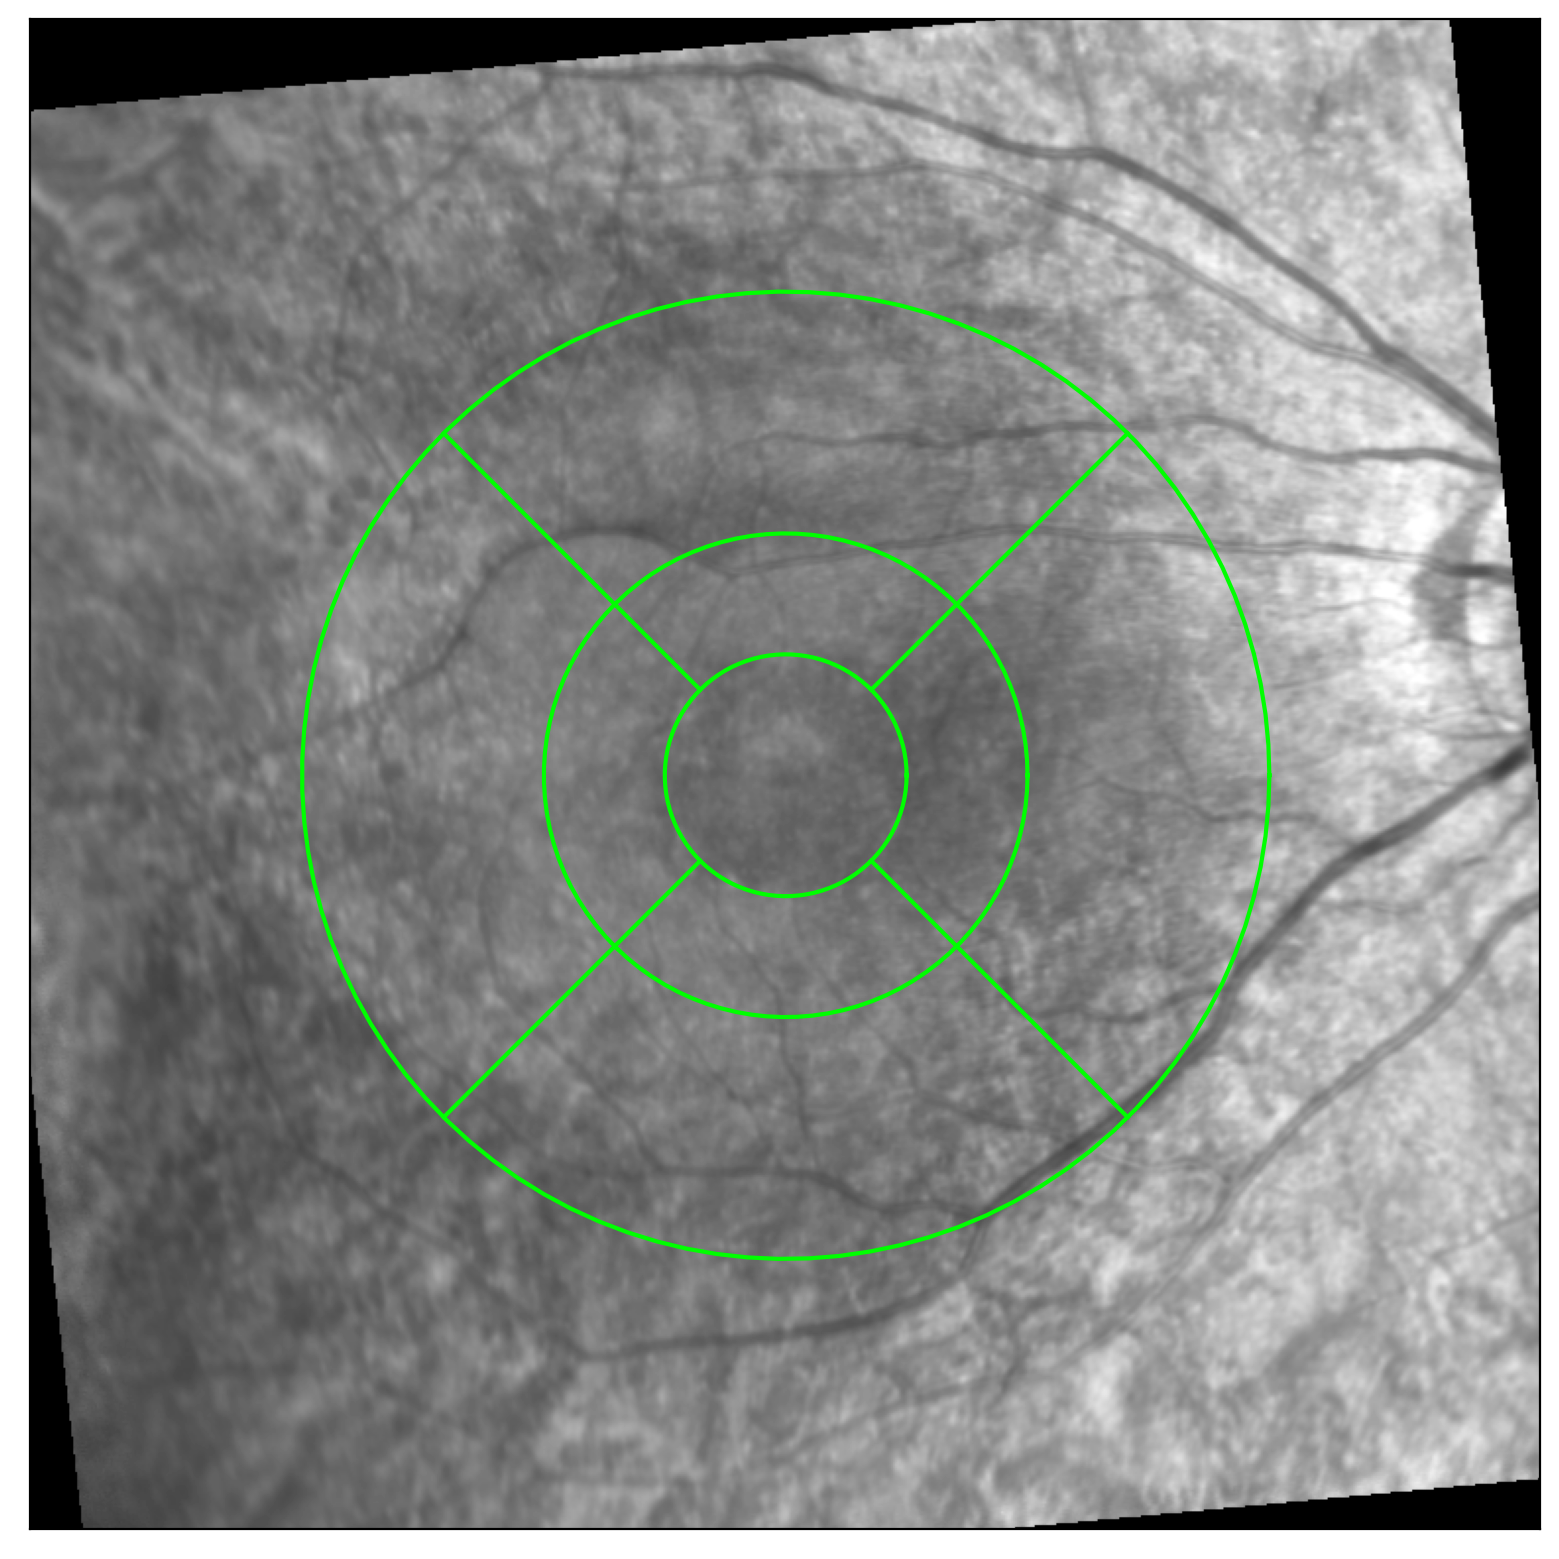

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from oct_library import OCTProcessing
from utils.utils import get_filenames

base_path = '../logs/unet_08_23_00_58_32_merged/'
model_path = os.path.join(base_path, 'checkpoints/model.pth')
config_path = os.path.join(base_path, 'experiment_cfg.yaml')

oct_path = '../data_UKB/Analysis_dataset'
# oct_path = '../data_UKB/2_OCTAnnotated'

oct_files = get_filenames(oct_path, 'vol')

rand_pick = np.random.randint(0,len(oct_files))
print(rand_pick, oct_files[106])

oct_process = OCTProcessing(oct_file=oct_files[106], config_path=config_path, model_path=model_path)
oct_process.plot_slo_fovea()
oct_process.plot_slo_etdrs()
# plt.savefig('slo_etdrs.svg')

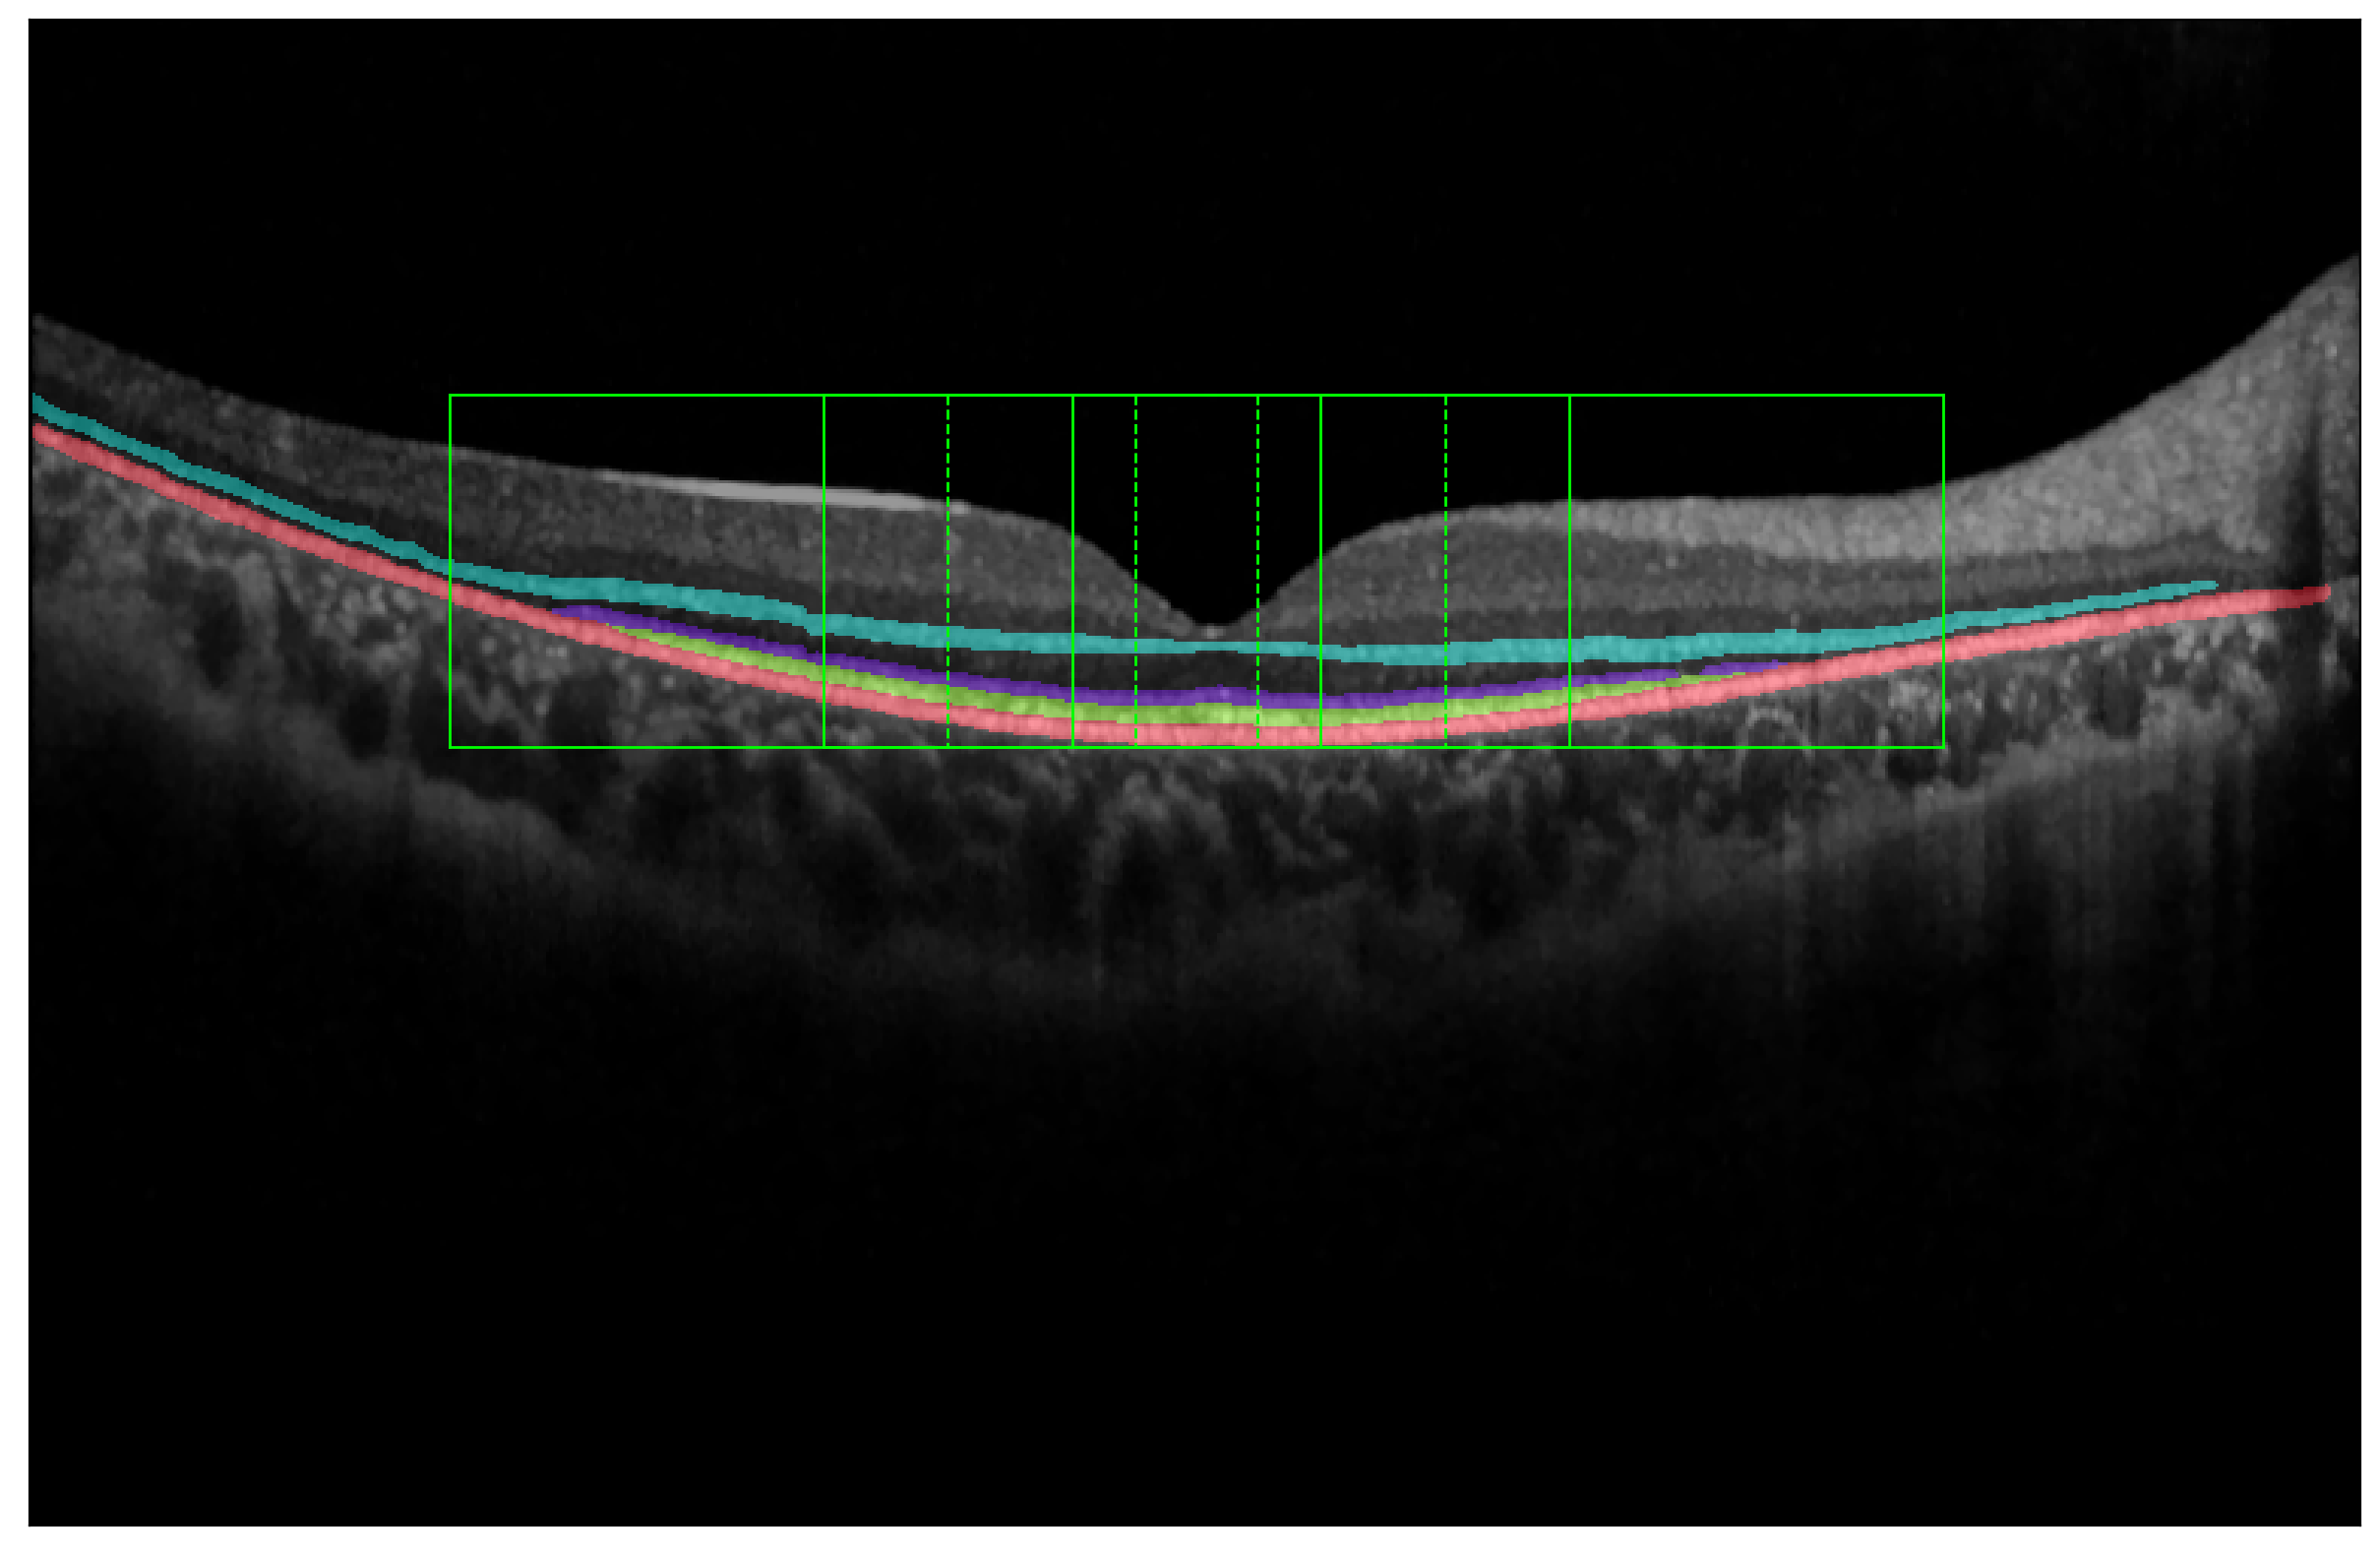

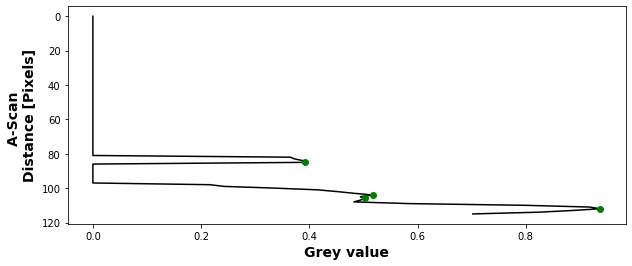

PID : P004_5681571
Patient : RPE65
Laterality : OD
DOB : 2011-08-05
Age : pediatric
visit_date : 2023-03-13
DOS : 2021-02-17
MPT : 24
N_Bscans : 61
Fovea_BScan : 30
scale_y : 0.0038716697599738836
scale_x : 0.012067940086126328
Y_Fovea : 384.0
Fovea_xstart : 0.0
Fovea_xstop : 768.0
Volume_area : nan
ETDRS_loc : 1mm
rEZI_mean : 21.955878201309307
EZ_th_mean : 15.869066176683079
EZ_OPL_mean : 90.37043805597577
EZ_ELM_mean : 24.64648310617521
EZ_BM_mean : 32.72033102026709
ELM_BM_mean : 57.3668141264423
EZ_TV_mean : 1.0948517337969672
rEZI_std : 1.2198727026702574
EZ_th_std : 1.981184252260144
EZ_OPL_std : 5.679220150080152
EZ_ELM_std : 3.9885209237684554
EZ_BM_std : 4.5309648233804
ELM_BM_std : 3.149311774412324
EZ_TV_std : 0.1736351098081899
rEZI_mean_nasal : 21.76809708690996
EZ_th_mean_nasal : 16.93855519988574
EZ_OPL_mean_nasal : 89.80385223744301
EZ_ELM_mean_nasal : 25.401930864218894
EZ_BM_mean_nasal : 32.86197747490028
ELM_BM_mean_nasal : 58.263908339119176
EZ_TV_mean_nasal : 1.17

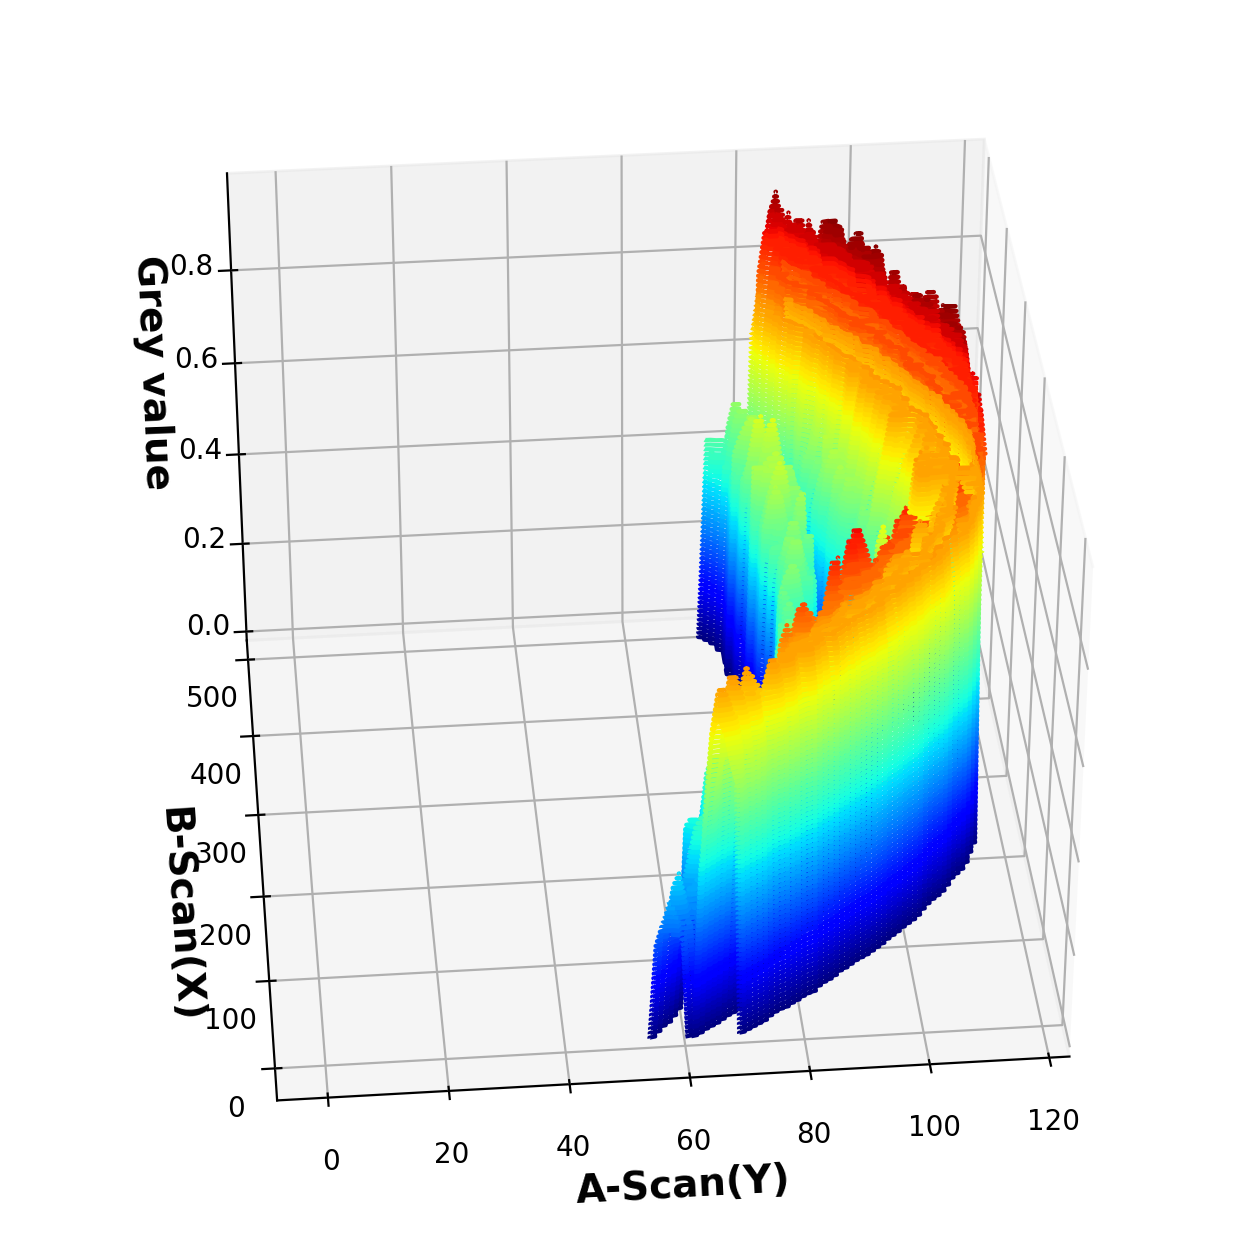

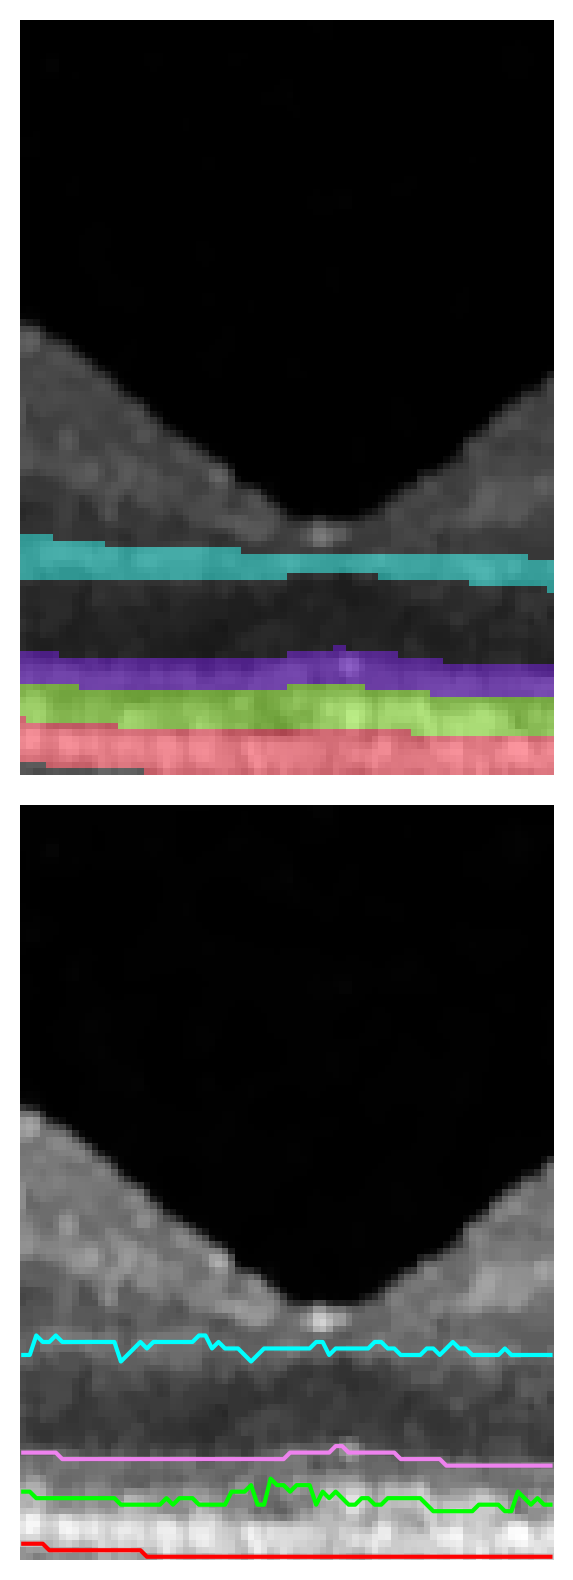

In [2]:
oct_process.fovea_forward(ETDRS_loc='1mm')
oct_process.plot_segmentation_localization(etdrs=True)
oct_process.plot_intensity_profiles(interpolation_3d=True)
# oct_process.plot_total_variation_alphas(beta=3, xlabel=True)
# plt.savefig('control_beta3.svg')
# oct_process.plot_total_variation_alphas(beta=5, xlabel=True)
# plt.savefig('control_beta5.svg')
# oct_process.plot_total_variation_alphas(beta=7, xlabel=True)
# plt.savefig('control_beta7.svg')
# plt.show()
for key, value in oct_process.results.items():
    print(key, ':', value)
oct_process.plot_results_roi()

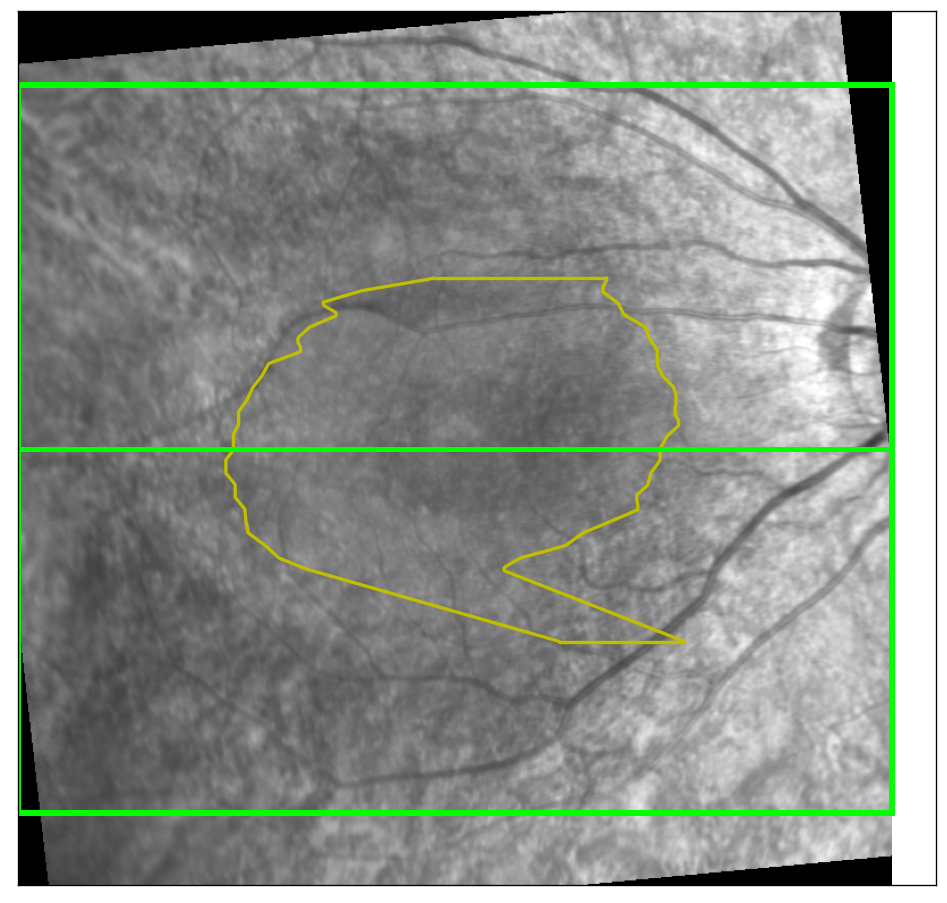

In [3]:
oct_process.volume_forward(interpolated=True, tv_smooth=True, plot=True, bscan_positions=False)
# plt.savefig('EZ_volume_limits_RPE65.svg')